In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('OnlineRetail_.csv',encoding='latin-1')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# 1. Deal with data format
- Customer ID: transform to string format
- InvoiceDate: transform to datetime format

In [6]:
# CustomerID
df['CustomerID'] = df['CustomerID'].apply(lambda x: str(x)[:5] if np.isnan(x) == False else np.nan)

In [7]:
# InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


# 2. Exploratory Data Analysis
1. Number of transactions by purchase date
2. Sales revenue by purchase date
3. Customer purchase frequency and spending distribution

## 2.1 Number of transactions by purchase date

In [9]:
# display lattest and earliest invoice date
print(df.InvoiceDate.max())
print(df.InvoiceDate.min())

2011-12-09 12:50:00
2010-12-01 08:26:00


In [11]:
df.rename(columns={'InvoiceDate':'InvoiceDatetime'},inplace=True)

In [12]:
# extract date feature from datetime
df['InvoiceDate'] = df['InvoiceDatetime'].apply(lambda x: x.date())

Text(0, 0.5, 'Number of transactions')

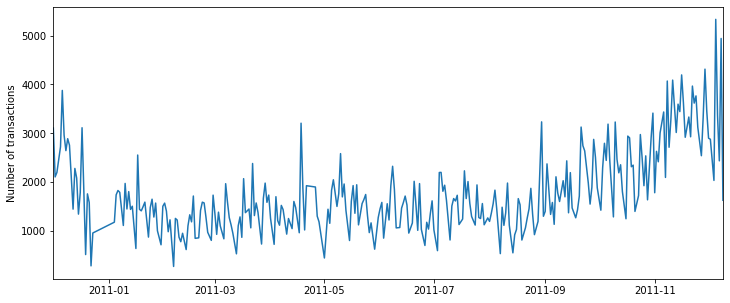

In [18]:
plt.figure(figsize=(12,5))
df.InvoiceDate.value_counts().plot()
plt.ylabel('Number of transactions')

## 2.2 Sales revenue by purchase date

In [14]:
# revenue = quantity * unit price
df['Revenue'] = df['Quantity']*df['UnitPrice']

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDatetime,UnitPrice,CustomerID,Country,InvoiceDate,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,20.34


Text(0, 0.5, 'Revenue of the day')

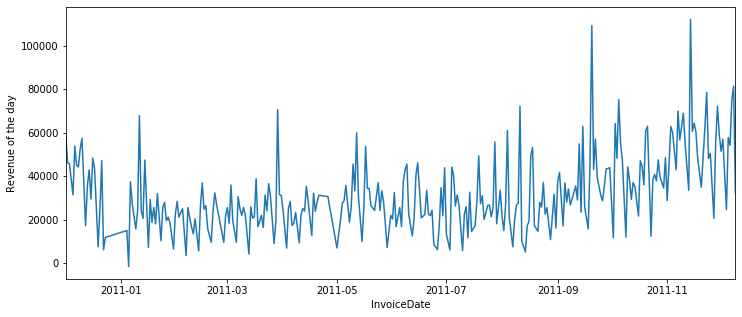

In [19]:
plt.figure(figsize=(12,5))
df.groupby('InvoiceDate')['Revenue'].sum().plot()
plt.ylabel('Revenue of the day')

## 2.3 Country distribution

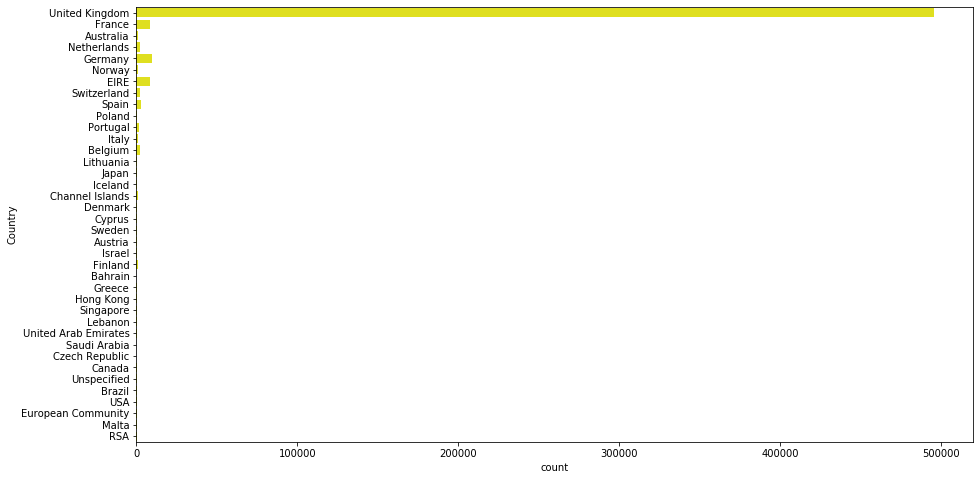

In [61]:
plt.figure(figsize=(15,8))
sns.countplot(y='Country',data=df,color='yellow')
# plt.xlim([1,50000])

## 2.4 Customer purchase frequency and spending distribution

Text(0.5, 1.0, 'Customer Spending Distribution')

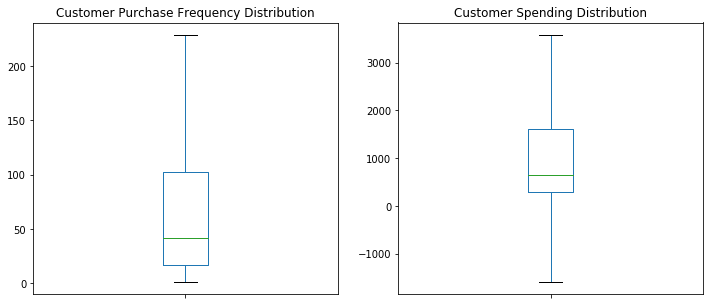

In [43]:
f,ax = plt.subplots(1,2,figsize=(12,5))
df.groupby('CustomerID')['InvoiceDate'].count().plot.box(showfliers=False,ax=ax[0],label='')
ax[0].set_title('Customer Purchase Frequency Distribution')

df.groupby('CustomerID')['Revenue'].sum().plot.box(showfliers=False,ax=ax[1],label='')
ax[1].set_title('Customer Spending Distribution')

# 3. Sample Selection

In [62]:
# select data from UK
df_uk = df[df.Country == 'United Kingdom']
df_uk = df_uk.drop('Description',axis=1)

In [64]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 9 columns):
InvoiceNo          495478 non-null object
StockCode          495478 non-null object
Quantity           495478 non-null int64
InvoiceDatetime    495478 non-null datetime64[ns]
UnitPrice          495478 non-null float64
CustomerID         361878 non-null object
Country            495478 non-null object
InvoiceDate        495478 non-null object
Revenue            495478 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.8+ MB


In [65]:
# create 3m and 6m data sets
import datetime as datetime
df_3m = df_uk[(df_uk.InvoiceDatetime >= datetime.datetime(2011,3,1)) & (df_uk.InvoiceDatetime < datetime.datetime(2011,6,1))]
df_6m = df_uk[(df_uk.InvoiceDatetime >= datetime.datetime(2011,6,1)) & (df_uk.InvoiceDatetime < datetime.datetime(2011,12,1))]

# 4. Feature Engineering
1. RFM model
2. Customer Lifetime Value (LTV) assessment
3. Dummie variables

## 4.1 RFM model

In [66]:
# create customer list
cust = pd.DataFrame(df_3m.CustomerID.unique())
cust.columns = ['CustomerID']

In [67]:
# define a function for reordering random cluster

def order_cluster(random_cluster, measure, cust_df, ascend):
    cust_df_new = cust_df.groupby(random_cluster)[measure].mean().reset_index()
    cust_df_new = cust_df_new.sort_values(measure,ascending=ascend).reset_index(drop=True)
    cust_df_new['order'] = cust_df_new.index
    cust_df_final = pd.merge(cust_df,cust_df_new[[random_cluster,'order']],on=random_cluster)
    cust_df_final = cust_df_final.drop(random_cluster,axis=1)
    cust_df_final = cust_df_final.rename(columns={'order':random_cluster})
    return cust_df_final

In [69]:
# recency score

# latest purchase date
df_late = df_3m.groupby('CustomerID')['InvoiceDate'].max().reset_index() # reset_index() transform the object from Series to DataFrame
df_late = df_late.rename(columns={'InvoiceDate':'LatestDate'})

# days btw latest purchase date and end of the 3m time phase
df_late['Recency'] = df_late['LatestDate'].apply(lambda x: (datetime.date(2011,5,31) - x).days)

# K-Means clustering
kmeans_r = KMeans(n_clusters=5)
kmeans_r.fit(df_late[['Recency']]) # Double brackets!!
df_late['R_cluster'] = kmeans_r.predict(df_late[['Recency']])

# merge Recency and R_cluster to customer list
cust = pd.merge(cust,df_late[['CustomerID','Recency','R_cluster']],on='CustomerID') # Double brackets!!

# rename clusters with ordered score
cust = order_cluster('R_cluster','Recency',cust,False)

In [70]:
# frequency score

# purchase frequency
df_freq_all = df_3m.groupby('CustomerID')['InvoiceDate'].count().reset_index() # reset_index() transform the object from Series to DataFrame
df_freq_all = df_freq_all.rename(columns={'InvoiceDate':'Freq'})
df_freq = df_freq_all[df_freq_all.Freq<df_freq_all.Freq.quantile(0.99)] # exclude outliers from clustering


# K-Means clustering
kmeans_f = KMeans(n_clusters=5)
kmeans_f.fit(df_freq[['Freq']]) # Double brackets!!
df_freq['F_cluster'] = kmeans_f.predict(df_freq[['Freq']])

# merge Frequency and F_cluster to customer list
cust = pd.merge(cust,df_freq_all[['CustomerID','Freq']],on='CustomerID') # Double brackets!!
cust = pd.merge(cust,df_freq[['CustomerID','F_cluster']],on='CustomerID',how='left') 
cust = cust.fillna(cust.groupby('F_cluster')['Freq'].mean().idxmax()) # assign a cluster name to the outliers

# rename clusters with ordered score
cust = order_cluster('F_cluster','Freq',cust,True)

C:\Users\ze688sb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [71]:
# monetary score

# purchase monetary amount (revenue)
df_rev_all = df_3m.groupby('CustomerID')['Revenue'].sum().reset_index() # reset_index() transform the object from Series to DataFrame
df_rev_all = df_rev_all.rename(columns={'Revenue':'Money'})
df_rev = df_rev_all[df_rev_all.Money < df_rev_all.Money.quantile(0.99)] # exclude outliers from clustering


# K-Means clustering
kmeans_m = KMeans(n_clusters=5)
kmeans_m.fit(df_rev[['Money']]) # Double brackets!!
df_rev['M_cluster'] = kmeans_m.predict(df_rev[['Money']])

# merge Money and M_cluster to customer list
cust = pd.merge(cust,df_rev_all[['CustomerID','Money']],on='CustomerID') # Double brackets!!
cust = pd.merge(cust,df_rev[['CustomerID','M_cluster']],on='CustomerID',how='left') # Double brackets!!
cust = cust.fillna(cust.groupby('M_cluster')['Money'].mean().idxmax()) # assign a cluster name to the outliers

# rename clusters with ordered score
cust = order_cluster('M_cluster','Money',cust,True)

C:\Users\ze688sb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [72]:
# overall RFM score
cust['Total'] = cust['R_cluster'] + cust['F_cluster'] + cust['M_cluster']

Text(0, 0.5, 'No. of Customer')

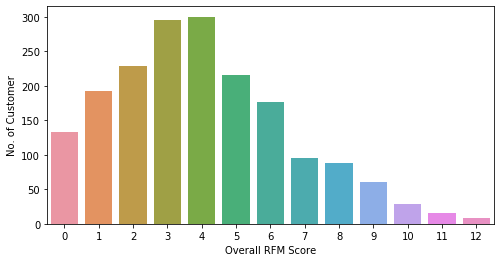

In [76]:
# plot overall score distribution
#score_dist = cust.Total.value_counts().sort_index().reset_index()

plt.figure(figsize=(8,4))
#sns.barplot(x='index',y='Total',data=score_dist,palette='rainbow')
sns.countplot(x='Total',data=cust)
plt.xlabel('Overall RFM Score')
plt.ylabel('No. of Customer')

In [77]:
# low/mid/high value assessment based on total score
cust['Value'] = 'Low-Value'
cust.loc[cust['Total']>2,'Value'] = 'Mid-Value'
cust.loc[cust['Total']>5,'Value'] = 'High-Value'

Text(0, 0.5, '')

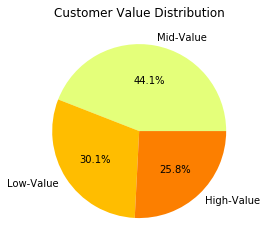

In [78]:
# plot value result in a pie chart
cust.Value.value_counts().plot.pie(colormap='Wistia',autopct='%1.1f%%')
plt.title('Customer Value Distribution')
plt.ylabel('')

## 4.2 Customer Lifetime Value (LTV) assessment

In [79]:
# calculate 6m revenue as LTV
df_6m_rev = df_6m.groupby('CustomerID')['Revenue'].sum().reset_index()
df_6m_rev.columns = ['CustomerID','Revenue_6m']

In [80]:
df_6m_rev.Revenue_6m.describe()

count      3167.000000
mean       1239.685078
std        4782.390775
min       -4287.630000
25%         257.780000
50%         521.200000
75%        1148.670000
max      180469.050000
Name: Revenue_6m, dtype: float64

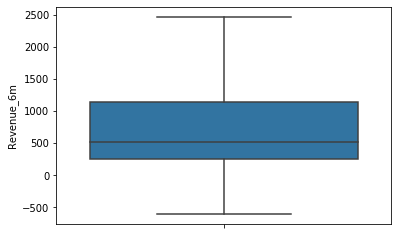

In [81]:
sns.boxplot(y='Revenue_6m',data=df_6m_rev,showfliers=False) # outliers will not be displayed

In [91]:
# explore number of LTV outliers
low=-500
high=5000

x1 = len(df_6m_rev[df_6m_rev['Revenue_6m']<low])
x3 = len(df_6m_rev[df_6m_rev['Revenue_6m']>high])
x2 = len(df_6m_rev) - x1 - x3
print('LTV<{}: {}'.format(low,x1))
print('{}<=LTV<{}: {}'.format(low,high,x2))
print('LTV>{}: {}'.format(high,x3))

LTV<-500: 5
-500<=LTV<5000: 3070
LTV>5000: 92


Text(0.5, 0, 'LTV (Revenue_6m)')

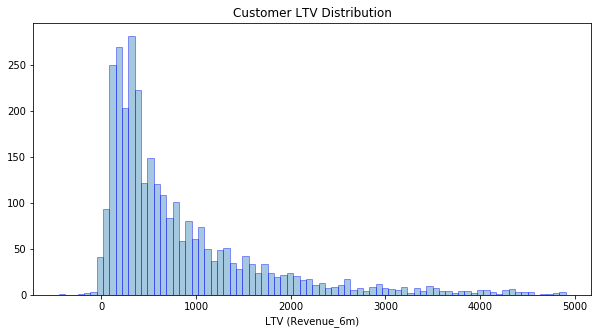

In [87]:
# plot LTV distribution without outliers
plt.figure(figsize=(10,5))
sns.distplot(df_6m_rev[(df_6m_rev['Revenue_6m']<5000) & (df_6m_rev['Revenue_6m']>-500)]['Revenue_6m'],kde=False,bins=80,
             hist_kws={'edgecolor':'blue'}) # bar edgecolor is specified in hist_kws
plt.title('Customer LTV Distribution')
plt.xlabel('LTV (Revenue_6m)')

In [88]:
# compare LTV vs. RFM score/value

In [89]:
# merge 6m LTV with 3m customer list
cust_ltv = pd.merge(cust,df_6m_rev,on='CustomerID',how='left') # merge type defined by --> how <--
cust_ltv = cust_ltv.fillna(0)

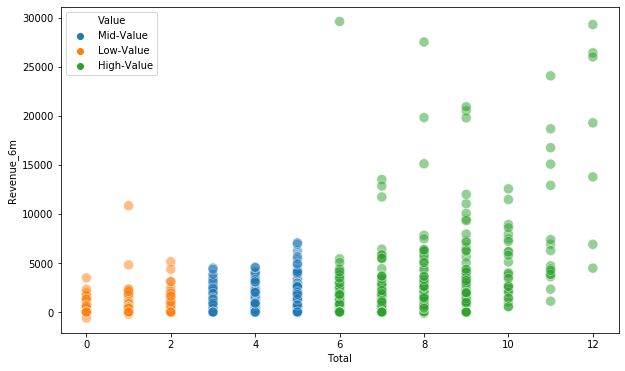

In [92]:
# plot
cust_graph = cust_ltv[cust_ltv['Revenue_6m']<30000]

plt.figure(figsize=(10,6))
sns.scatterplot(x='Total',y='Revenue_6m',data=cust_graph,hue='Value',s=100,alpha=0.5)

In [93]:
# LTV score

In [94]:
# remove outlier
cust_ltv = cust_ltv[cust_ltv['Revenue_6m']<cust_ltv['Revenue_6m'].quantile(0.99)]

In [95]:
# K-Means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(cust_ltv[['Revenue_6m']])
cust_ltv['LTV_cluster'] = kmeans.predict(cust_ltv[['Revenue_6m']])

# rename clusters with ordered score
cust_ltv = order_cluster('LTV_cluster','Revenue_6m',cust_ltv,True)

In [96]:
cust_ltv.groupby('LTV_cluster').Revenue_6m.describe()

,count,mean,std,min,25%,50%,75%,max
LTV_cluster,,,,,,,,
0,1394.0,396.137189,419.891843,-609.40,0.000,294.220,682.4300,1429.87
1,371.0,2492.794933,937.341566,1445.31,1731.980,2162.930,3041.9550,5287.39
2,56.0,8222.565893,2983.572030,5396.44,6151.435,6986.545,9607.3225,16756.31


Text(0, 0.5, '')

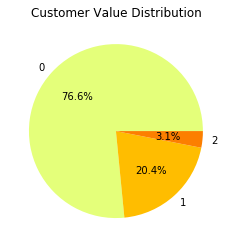

In [97]:
# plot LTV_cluster result in a pie chart
cust_ltv.LTV_cluster.value_counts().plot.pie(colormap='Wistia',autopct='%1.1f%%')
plt.title('Customer Value Distribution')
plt.ylabel('')

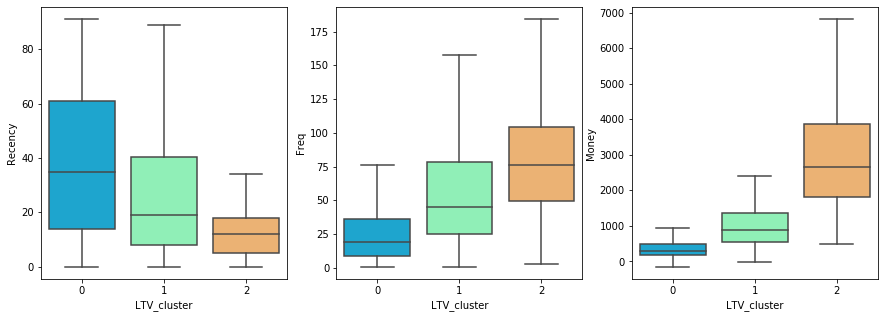

In [109]:
# feature distribution by LTV_cluster
f,ax = plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='LTV_cluster',y='Recency',data=cust_ltv,showfliers=False,ax=ax[0],palette='rainbow')
sns.boxplot(x='LTV_cluster',y='Freq',data=cust_ltv,showfliers=False,ax=ax[1],palette='rainbow')
sns.boxplot(x='LTV_cluster',y='Money',data=cust_ltv,showfliers=False,ax=ax[2],palette='rainbow')

Text(0.5, 0, 'Overall RFM Score')

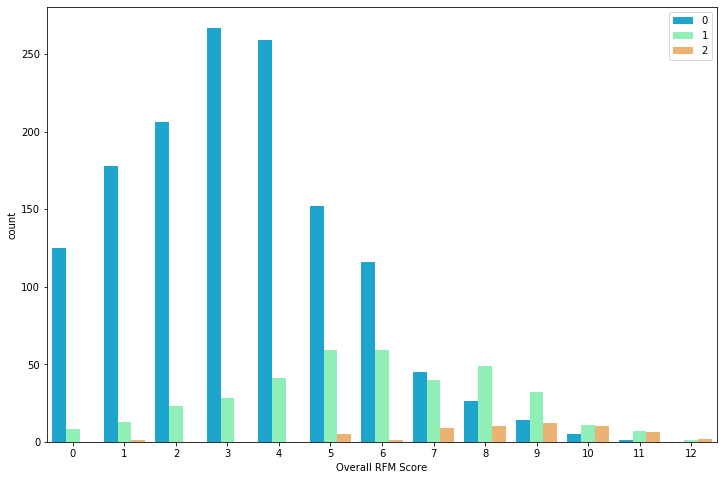

In [112]:
# RFM score vs. LTV_cluster
plt.figure(figsize=(12,8))
sns.countplot(x='Total',data=cust_ltv,hue='LTV_cluster',palette='rainbow')
plt.legend(loc='upper right')
plt.xlabel('Overall RFM Score')

## 4.3 Dummy variables

In [115]:
# dummy variables
value_dum = pd.get_dummies(cust_ltv['Value'])
cust_final = pd.concat([cust_ltv,value_dum],axis=1)
cust_final = cust_final.drop('Value',axis=1)

(12, 0)

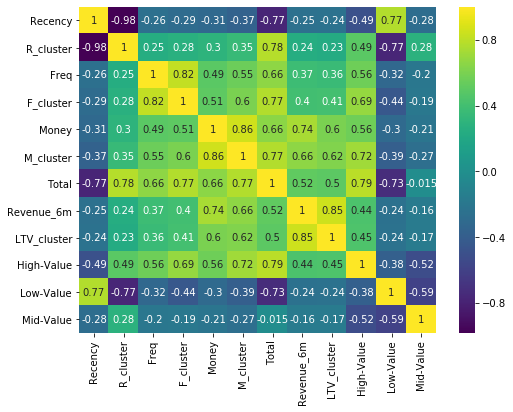

In [116]:
# plot correlations
plt.figure(figsize=(8,6))
sns.heatmap(cust_final.corr(),cmap='viridis',annot=True)
plt.ylim([12,0])

# 5. Model Training

In [117]:
# create features (X) and labels (y)
X = cust_final.drop(['CustomerID','Revenue_6m','LTV_cluster'],axis=1)
y = cust_final['LTV_cluster']

In [155]:
# split train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [119]:
from xgboost import XGBClassifier

In [184]:
model = XGBClassifier(max_depth=6,learning_rate=0.03,objective='multi:softprob',n_jobs=-1)

In [185]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.03, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [ ]:
# model evaluation

In [186]:
model.score(X_train,y_train)

0.8821733821733821

In [187]:
model.score(X_test,y_test)

0.825136612021858

In [188]:
y_pred = model.predict(X_test)

In [129]:
from sklearn.metrics import classification_report, confusion_matrix

In [189]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       148
           1       0.46      0.37      0.41        30
           2       0.75      0.60      0.67         5

    accuracy                           0.83       183
   macro avg       0.70      0.63      0.66       183
weighted avg       0.81      0.83      0.82       183



[[137  11   0]
 [ 18  11   1]
 [  0   2   3]]
